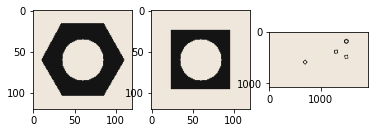

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template = cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 = cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()


Threshold value for hexnut_template is 116.0
Threshold value for squarenut_template is 116.0
Threshold value for conveyor_f100 is 128.0


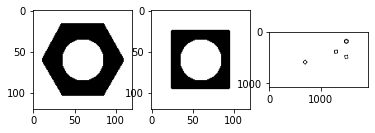

In [42]:
hexnut_template_gray=cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template_gray=cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_f100_gray=cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

blur1 = cv.GaussianBlur(hexnut_template_gray,(5,5),0)
ret1,th1 = cv.threshold(blur1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
blur2 = cv.GaussianBlur(squarenut_template_gray,(5,5),0)
ret2,th2 = cv.threshold(blur2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
blur3 = cv.GaussianBlur(conveyor_f100_gray,(5,5),0)
ret3,th3 = cv.threshold(blur3,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

print("Threshold value for hexnut_template is",ret1)
print("Threshold value for squarenut_template is",ret2)
print("Threshold value for conveyor_f100 is",ret3)
fig, ax = plt. subplots(1,3)
ax[0].imshow(th1,cmap='gray')
ax[1].imshow(th2,cmap='gray')
ax[2].imshow(th3,cmap='gray')
plt.show()


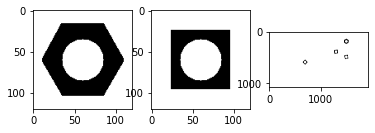

In [43]:
kernel=np.ones((3,3),np.uint8)
closing1= cv.morphologyEx(hexnut_template_gray,cv.MORPH_CLOSE,kernel)
closing2= cv.morphologyEx(squarenut_template_gray, cv.MORPH_CLOSE, kernel)
closing3= cv.morphologyEx(conveyor_f100_gray, cv.MORPH_CLOSE, kernel)
fig, ax = plt. subplots(1,3)
ax[0].imshow(closing1,cmap='gray')
ax[1].imshow(closing2,cmap='gray')
ax[2].imshow(closing3,cmap='gray')
plt.show()


In [71]:
connectivity = 4
# Perform the operation
output = cv.connectedComponentsWithStats(th3, connectivity)
# Get the results
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]